In [2]:
# import the librarys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the data from comma seprated values (csv file)
trainDf=pd.read_csv("train.csv")
testDf=pd.read_csv("test.csv")
print(trainDf.shape)
print(testDf.shape)

(40000, 15)
(10000, 14)


In [4]:
# this is binary classification problem and where song popularity is my dependent variable
trainDf.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [5]:
trainDf.tail()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
39995,39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39997,39997,160879.0,0.877431,0.409065,0.292671,NaN,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,1
39998,39998,193918.0,NaN,0.365738,NaN,0.000339,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,0
39999,39999,196475.0,0.007116,0.354585,0.994883,0.002191,1.0,0.200900,-4.875249,0,0.080549,101.974949,3,0.588549,0


In [6]:
trainDf.sample(2)

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
27969,27969,383457.0,0.951553,0.292339,0.146088,0.942583,6.0,0.130411,-7.407617,0,0.032819,97.110297,3,0.210122,0
3790,3790,259544.0,0.518424,0.532232,0.379789,-0.000350,10.0,0.184270,-17.166222,0,0.045731,90.479934,3,0.377771,0


In [7]:
trainDf.info()
# what i see in this data many columns contain null values and 11 columns are float and 4 columns are integer 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [14]:
trainDf.describe()
# what i see here. their is chances of outlier in some columns 

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


In [16]:
# lets impute the null values before doing EDA 
print(trainDf.isnull().sum().sum())
((trainDf.isnull().sum()/trainDf.isnull().count())*100).sort_values(ascending=False)

32187


song_duration_ms    10.2525
liveness            10.2150
key                 10.1625
danceability        10.0650
acousticness         9.9800
instrumentalness     9.9625
energy               9.9375
loudness             9.8925
id                   0.0000
audio_mode           0.0000
speechiness          0.0000
tempo                0.0000
time_signature       0.0000
audio_valence        0.0000
song_popularity      0.0000
dtype: float64

In [ ]:
# total null values present in data is 32187 
# obove 8  columns contain null values 
# i don't see any pattern in null values thats why going for imputation with median 
# why i choose median over mean because .what i see above is there is  chances of outlier in some columns and all columns are numeric , mean are sensative toword outlier  

In [18]:
for i in trainDf.columns:
   if i!="song_popularity":
    if trainDf[i].dtype!='O':
        tempmedian=trainDf[i].median()
        trainDf[i].fillna(tempmedian,inplace=True)
    else:
        tempmode=trainDf[i].mode()[0]
        trainDf[i].fillna(tempmode,inplace=True)
    
trainDf.isnull().sum()

id                  0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
song_popularity     0
dtype: int64

# univariate analysis and bavariate analysis -- explore each columns 


In [99]:
# 0 is mojority class and 1 is minority class 
trainDf['song_popularity'].value_counts()

0    25424
1    14576
Name: song_popularity, dtype: int64

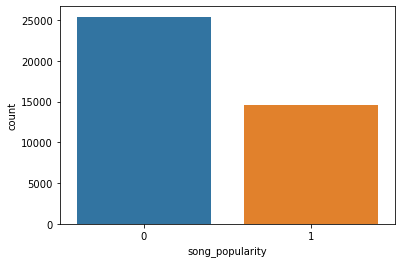

In [19]:
sns.countplot(trainDf['song_popularity'])
plt.show()

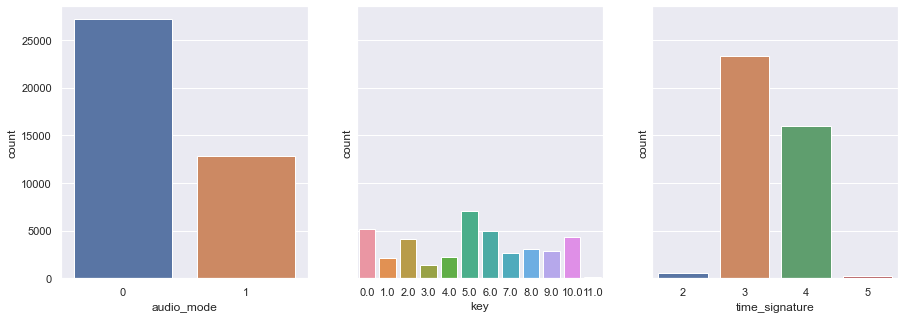

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.countplot(trainDf['audio_mode'],ax=axes[0])
sns.countplot(trainDf['key'],ax=axes[1])
sns.countplot(trainDf['time_signature'],ax=axes[2])
plt.show()

###  mostly song contain 3,4  time_ signature 
### 0 in audio_mode 
### 5 and 6 key caontain by most of us 

<AxesSubplot:xlabel='song_popularity', ylabel='tempo'>

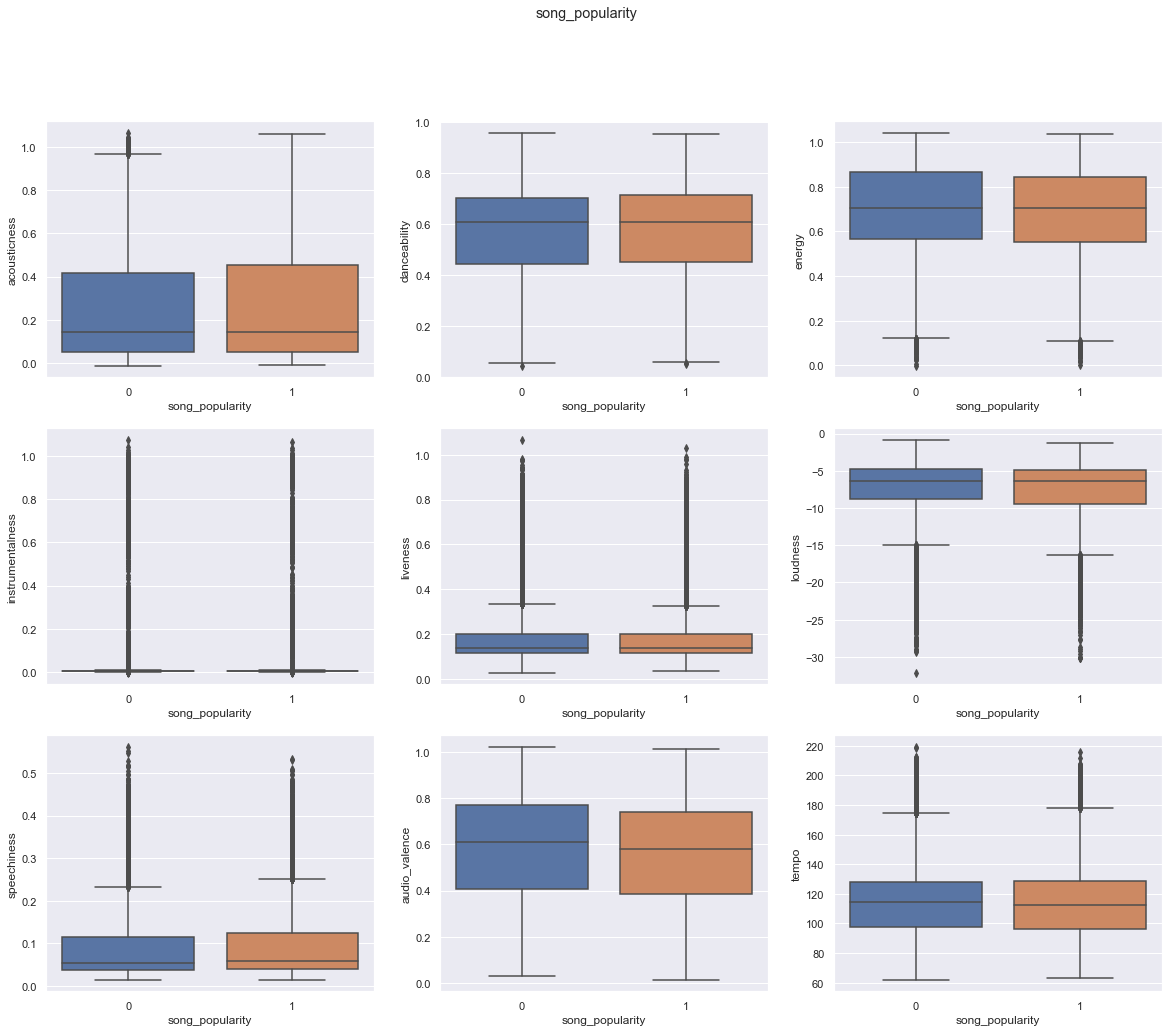

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

fig.suptitle('song_popularity')

sns.boxplot(ax=axes[0, 0], data=trainDf, x='song_popularity', y='acousticness')
sns.boxplot(ax=axes[0, 1], data=trainDf, x='song_popularity', y='danceability')
sns.boxplot(ax=axes[0, 2], data=trainDf, x='song_popularity', y='energy')
sns.boxplot(ax=axes[1, 0], data=trainDf, x='song_popularity', y='instrumentalness')
sns.boxplot(ax=axes[1, 1], data=trainDf, x='song_popularity', y='liveness')
sns.boxplot(ax=axes[1, 2], data=trainDf, x='song_popularity', y='loudness')
sns.boxplot(ax=axes[2, 0], data=trainDf, x='song_popularity', y='speechiness')
sns.boxplot(ax=axes[2, 1], data=trainDf, x='song_popularity', y='audio_valence')
sns.boxplot(ax=axes[2, 2], data=trainDf, x='song_popularity', y='tempo')

In [33]:
trainDf.groupby(by='song_popularity')['song_duration_ms'].mean()

song_popularity
0    192619.234739
1    192288.830818
Name: song_duration_ms, dtype: float64

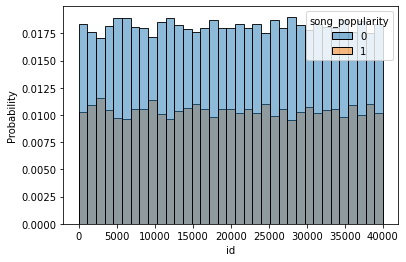

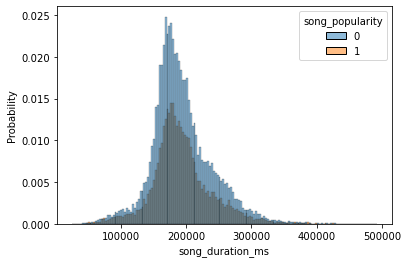

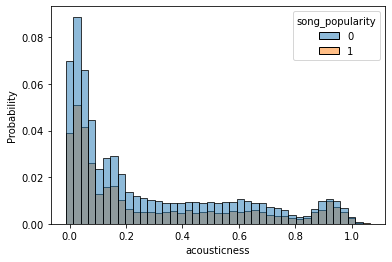

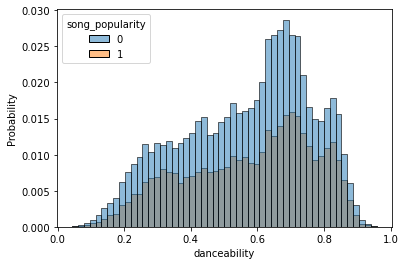

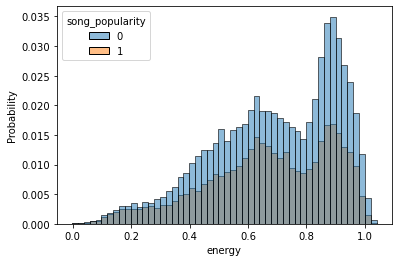

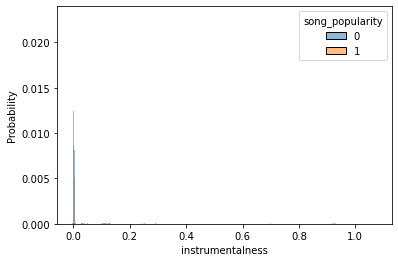

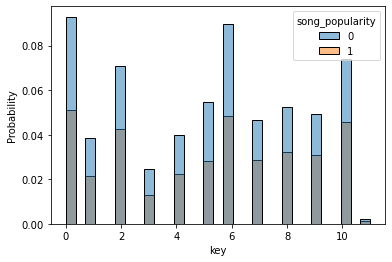

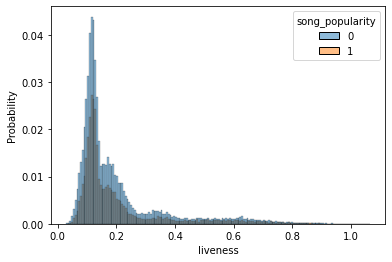

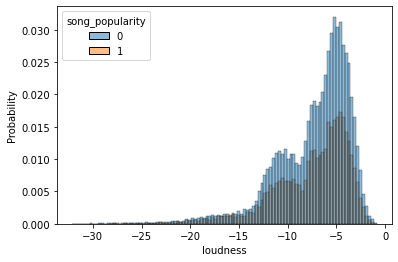

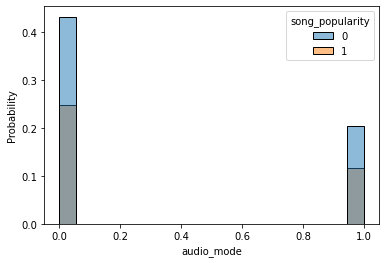

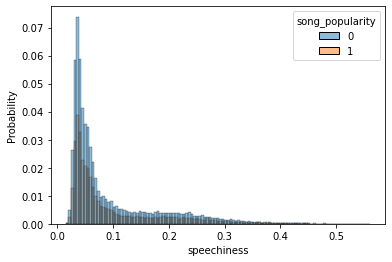

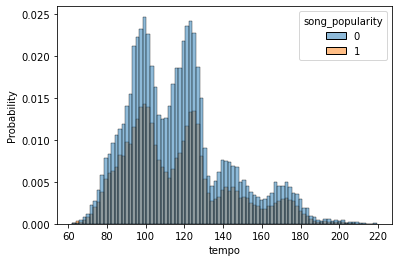

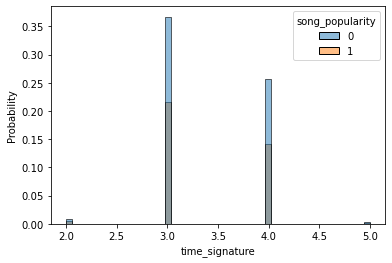

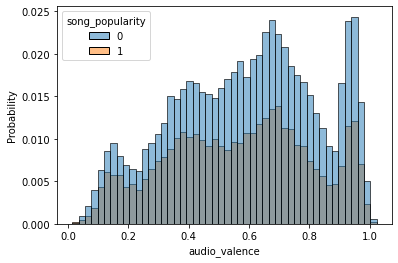

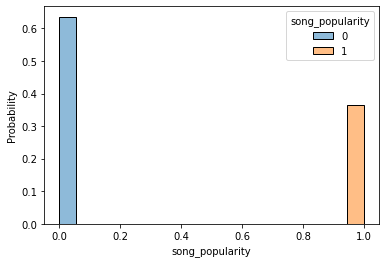

In [4]:
categoricalVars = trainDf.columns
for colName in categoricalVars: # enumerate gives key, value pair
    figure()
    sns.histplot(trainDf, x=colName, hue="song_popularity",stat="probability")

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

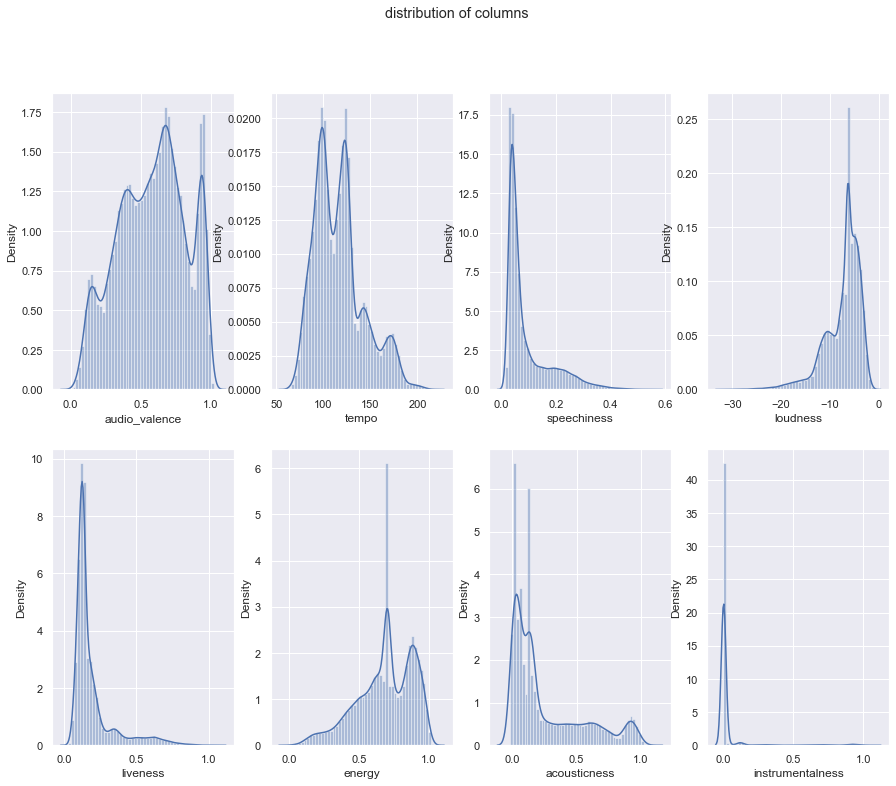

In [116]:

fig, axes = plt.subplots(2, 4, figsize=(15, 12))
fig.suptitle('distribution of columns')
sns.distplot(trainDf["audio_valence"],ax=axes[0, 0]) 
sns.distplot(trainDf["tempo"],ax=axes[0, 1])
sns.distplot(trainDf["speechiness"],ax=axes[0, 2])
sns.distplot(trainDf["loudness"],ax=axes[0, 3])
sns.distplot(trainDf["liveness"],ax=axes[1, 0])
sns.distplot(trainDf["energy"],ax=axes[1, 1])
sns.distplot(trainDf["acousticness"],ax=axes[1, 2])
sns.distplot(trainDf["instrumentalness"],ax=axes[1, 3])

In [ ]:
# some columns shown right skwedness like speachness ,tempo,liveness , acoustiness , instementainess 
# some columns shown left skwedness like energy and loudness 
# what i understand by this is large no of people prefer speachness ,tempo,liveness , acoustiness , instementainess  lower in range 
# but higer in range people prefer energy and loudness and normal prefer audio valence 

In [65]:
trainDf.groupby(by='song_popularity')['acousticness'].mean()

song_popularity
0    0.257557
1    0.272067
Name: acousticness, dtype: float64

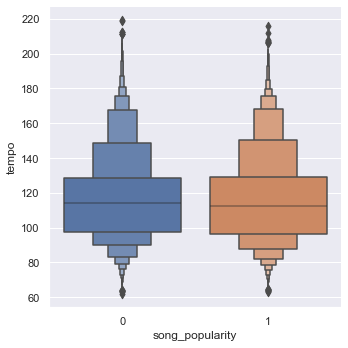

In [89]:
sns.set(style='darkgrid')
sns.catplot(x='song_popularity',y='tempo',data=trainDf,kind="boxen")

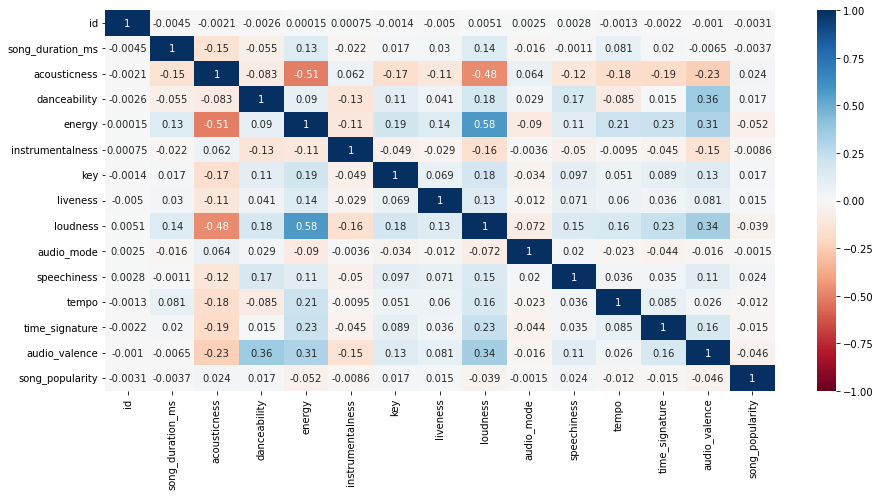

In [43]:
#  their is no strong corelation  b/w columns but some columns cantain weak corelation 
plt.figure(figsize=(15,7))
sns.heatmap(trainDf.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

<Figure size 432x504 with 0 Axes>

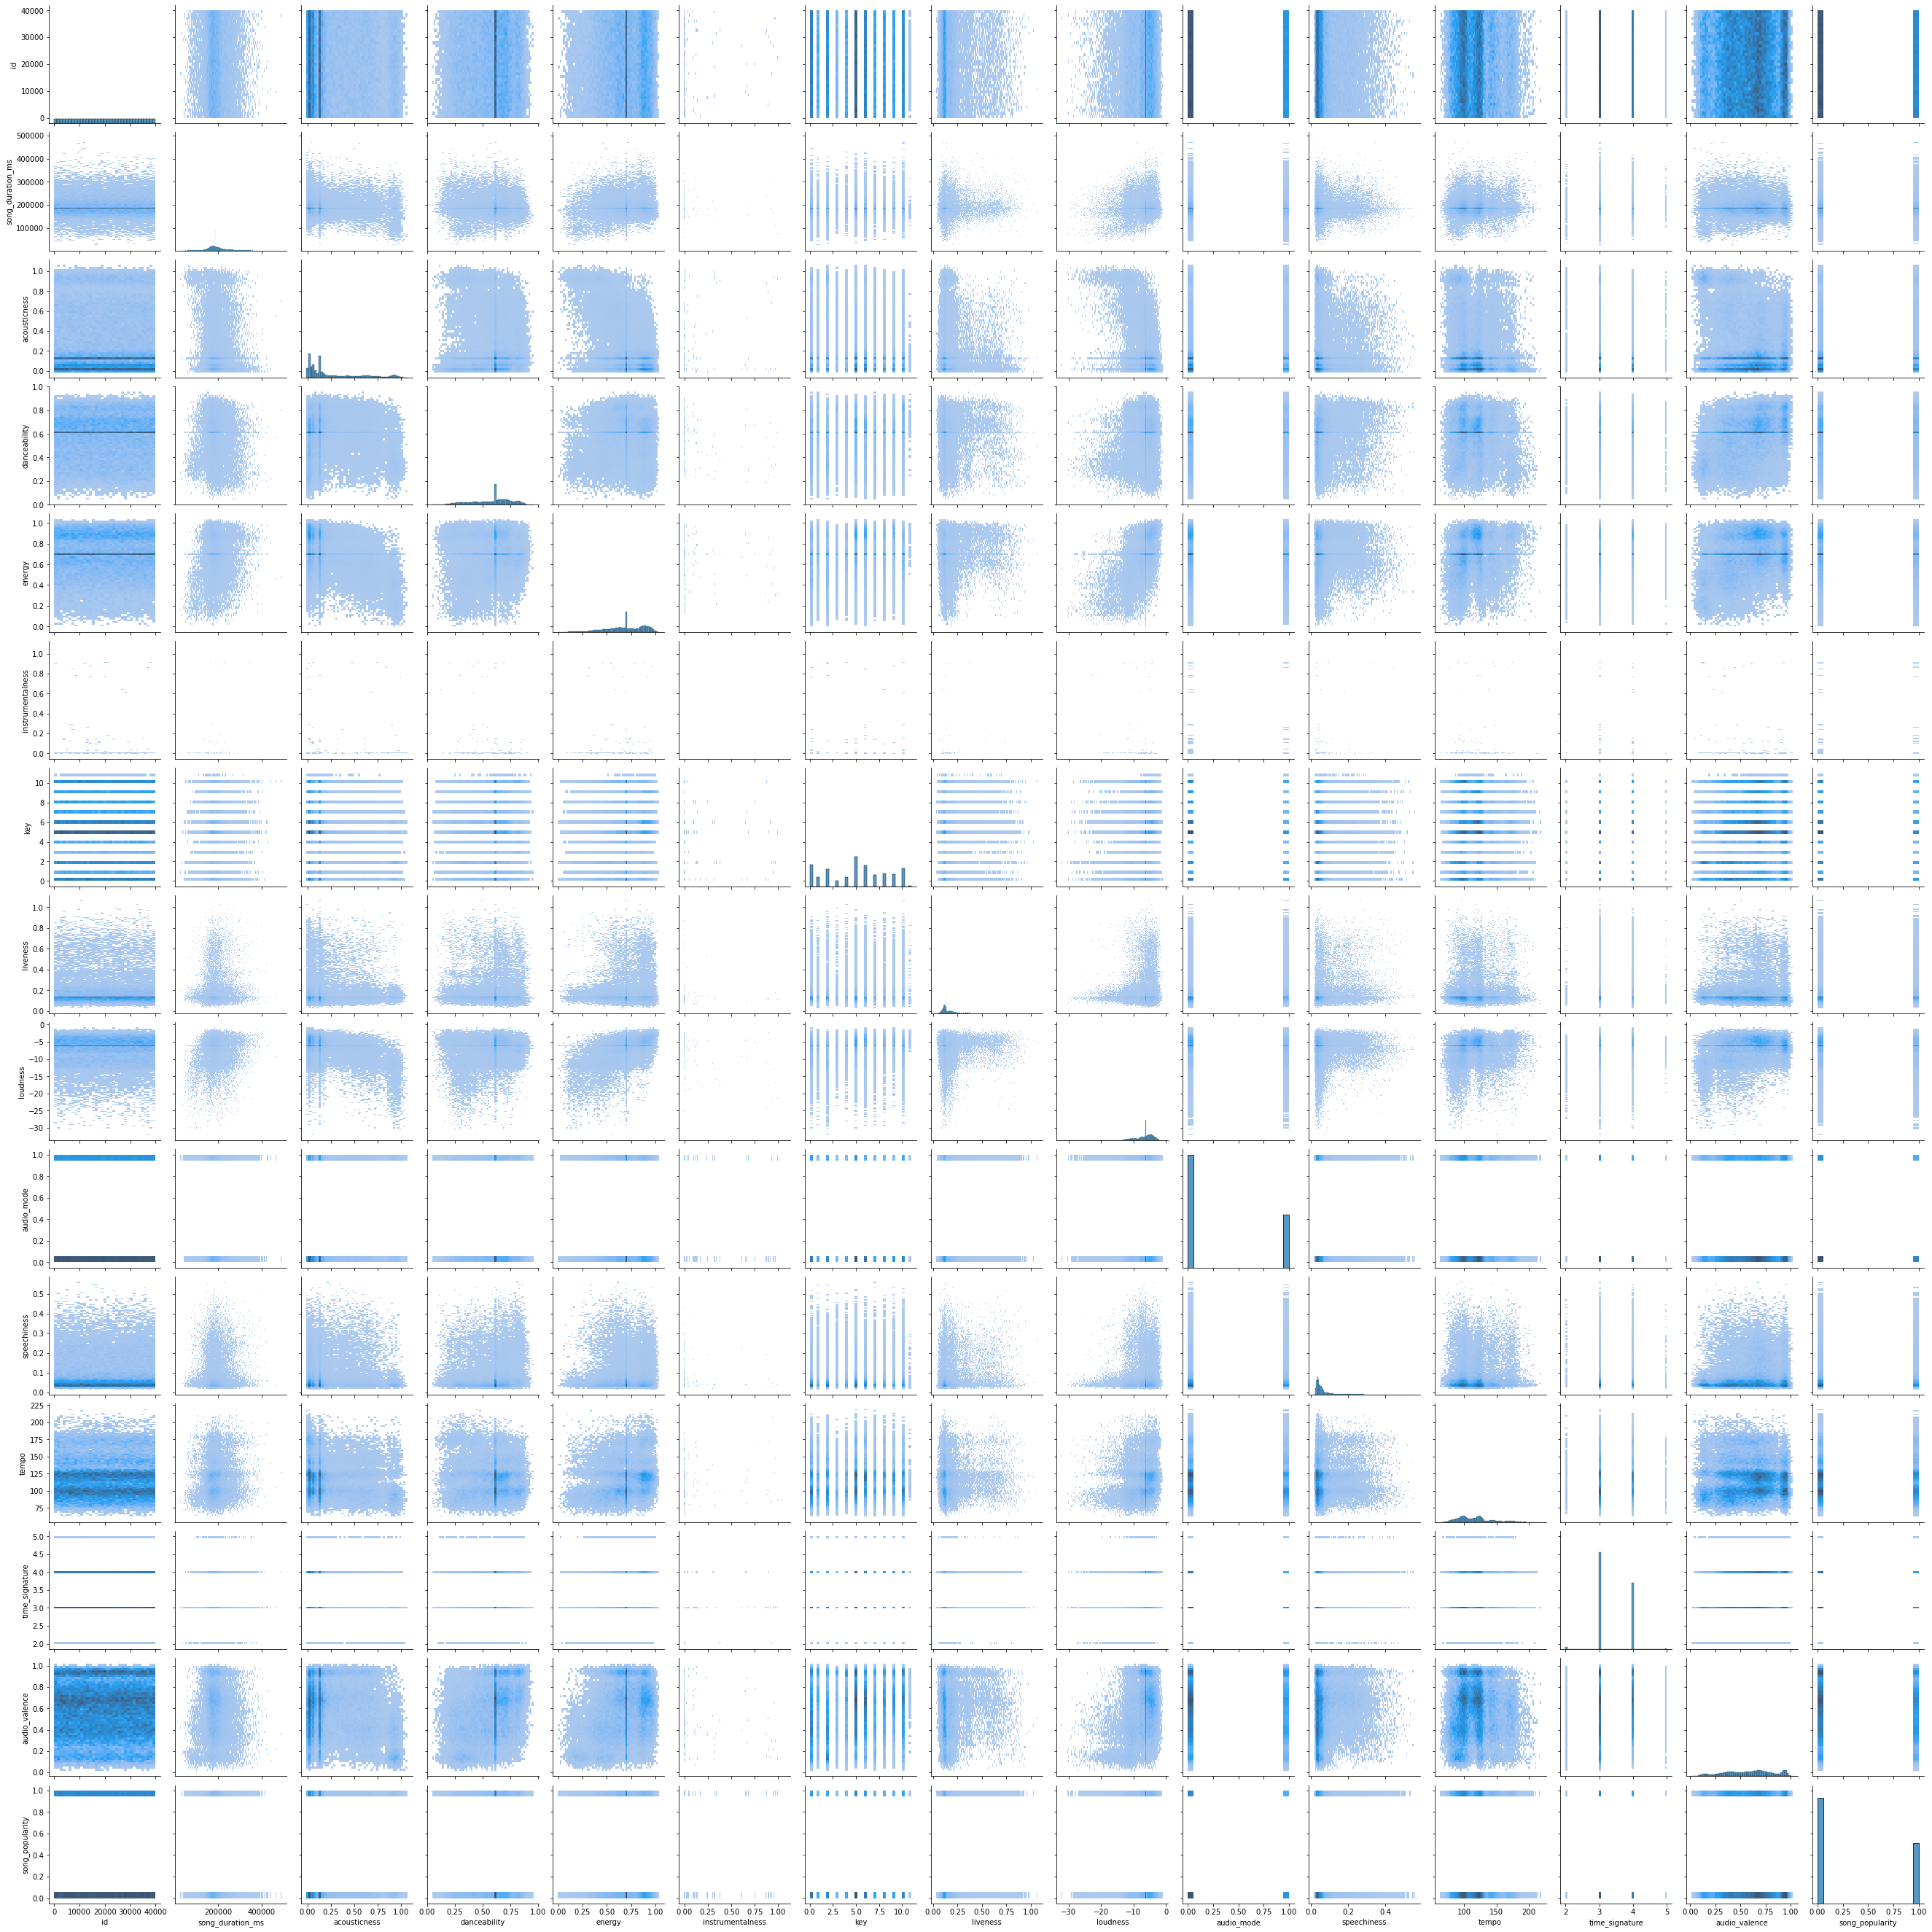

In [69]:
# in this you can see how different col show diffrent relation with each other 
sns.pairplot(trainDf,kind="hist")
plt.show()